In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import cv2 as cv
import os
import shutil
import random
import glob 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
#Organize the data
print(os.getcwd())
os.chdir('frames')
if os.path.isdir('train/unclean') is False:
    lst = os.listdir()
    for im in lst:
        img = os.path.join(os.getcwd(), im)
        img = cv.imread(img, 0)
        img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 31, 7)
        print(im)
        cv.imwrite(os.path.join(os.getcwd(), im), img)
    os.makedirs('train/unclean')
    os.makedirs('train/clean')
    os.makedirs('valid/unclean')
    os.makedirs('valid/clean')
    os.makedirs('test/unclean')
    os.makedirs('test/clean')
    
    for c in random.sample(glob.glob('clean*'), 2500):
        shutil.move(c, 'train/clean')
    for c in random.sample(glob.glob('unclean*'), 2500):
        shutil.move(c, 'train/unclean')
    for c in random.sample(glob.glob('clean*'), 200):
        shutil.move(c, 'valid/clean')
    for c in random.sample(glob.glob('unclean*'), 200):
        shutil.move(c, 'valid/unclean')
    for c in random.sample(glob.glob('clean*'), 200):
        shutil.move(c, 'test/clean')
    for c in random.sample(glob.glob('unclean*'), 200):
        shutil.move(c, 'test/unclean')
os.chdir('../')

C:\amey\autobot


In [4]:
train_path = 'frames/train'
test_path = 'frames/test'
valid_path = 'frames/valid'

In [5]:
os.getcwd()

'C:\\amey\\autobot'

In [6]:
train_batches = ImageDataGenerator()\
    .flow_from_directory(directory = train_path, target_size = (224, 224), color_mode = 'grayscale', classes = ['clean', 'unclean'], batch_size = 32)
valid_batches = ImageDataGenerator()\
    .flow_from_directory(directory = valid_path, target_size = (224, 224), color_mode = 'grayscale', classes = ['clean', 'unclean'], batch_size = 32)
test_batches = ImageDataGenerator()\
    .flow_from_directory(directory = valid_path, target_size = (224, 224), color_mode = 'grayscale',classes = ['clean', 'unclean'], batch_size = 32, shuffle = False)

Found 5000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
assert train_batches.n == 5000
assert valid_batches.n == 400
assert test_batches.n == 400
assert train_batches.num_classes == test_batches.num_classes == valid_batches.num_classes == 2

In [8]:
imgs, labels = next(train_batches)
print(test_batches)

In [9]:
model = Sequential([Conv2D(filters = 50, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224, 224,1)),
                    MaxPool2D(pool_size=(2,2), strides = 2),
                    Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu', padding = 'same'),
                    MaxPool2D(pool_size = (2,2), strides = 2),
                    Flatten(),
                    Dense (units = 2, activation = 'softmax'),
               ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 50)      500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 50)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      28864     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 430,774
Trainable params: 430,774
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 6, verbose = 2 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 157 steps, validate for 13 steps
Epoch 1/6
157/157 - 29s - loss: 13.2476 - accuracy: 0.8826 - val_loss: 0.0100 - val_accuracy: 0.9950
Epoch 2/6
157/157 - 20s - loss: 0.1539 - accuracy: 0.9834 - val_loss: 0.0258 - val_accuracy: 0.9925
Epoch 3/6
157/157 - 20s - loss: 0.2384 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 0.9925
Epoch 4/6
157/157 - 19s - loss: 0.0124 - accuracy: 0.9932 - val_loss: 0.0126 - val_accuracy: 0.9925
Epoch 5/6
157/157 - 19s - loss: 0.0292 - accuracy: 0.9928 - val_loss: 0.0093 - val_accuracy: 0.9950
Epoch 6/6
157/157 - 19s - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0538 - val_accuracy: 0.9925


In [13]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
predictions = model.predict(x = test_batches, verbose = 2)

13/13 - 1s


In [15]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [16]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

In [17]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("confusion Matrix without Normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        

In [18]:
test_batches.class_indices

{'clean': 0, 'unclean': 1}

confusion Matrix without Normalization
[[198   2]
 [  1 199]]


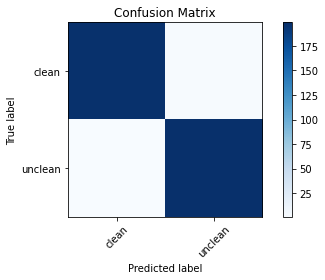

In [19]:
cm_plot_labels = ['clean', 'unclean']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')

In [20]:
if os.path.isfile('models/train.h5') is False:
    model.save('models/train.h5')

In [21]:
if os.path.isfile('models/model.json') is False:
    model_json = model.to_json()
    with open("models/model.json", "w") as json_file:
        json_file.write(model_json)